# Baseball Case Study

## Project Description -
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

##                                                     Input features -
    W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

    R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

    AB - This means At bat or time at bat. It's is a batter's turn batting against a pitcher: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

    H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

    2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

    3B - This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

    HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

    BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.


    SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

    SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

    RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

    ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

    ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

    CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

    SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

    SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

    E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

We need to predict number of wins on the basis of Wins(w). 'w' is our target column.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from SkLearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
#df = pd.read_csv('Downloads\baseball.csv')
df= pd.read_csv("C:\\Users\\gupta\\Downloads\\baseball.csv")

In [3]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

* This dataset contains 16 features which contains statistics summary of the Baseball players and the 'W' (wins) is the target variable which predicts the number of wins.
* Input features in this dataset are : Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
* Target features : Number of predicted wins (W)

The column names in our dataset appear to be obscure and require interpretation to become comprehensible. To enhance our understanding of the various columns in the dataset, I've referenced baseball statistics terminology from Wikipedia.

In [6]:
# Rename of abbreviated columns 
df.rename(columns={'W' : 'Wins',  'R' : 'Runs_Scored', 'AB' : 'At Bat', 'H' : 'Hits', '2B' : 'Doubles','3B' : 'Triples','HR' : 'Home_Runs', 'BB' : 'Base on Balls', 'SO' : 'Strike Outs','SB' : 'Stolen Base','RA' : 'Runs Average', 'ER' : 'Earned Runs', 'ERA' : 'Earned Run Average',  'CG' : 'Complete Game','SHO' : 'Shut Outs', 'SV' : 'Saves',  'E' : 'Errors'}, inplace=True)
df.head()

,Wins,Runs_Scored,At Bat,Hits,Doubles,Triples,Home_Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Text(0.5, 1.0, 'histogram of wins')

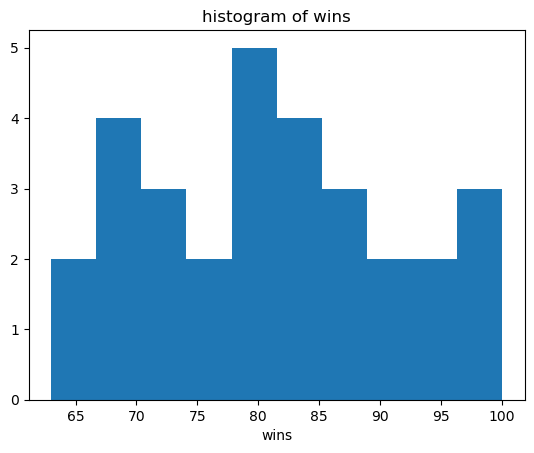

In [7]:

plt.hist(df['Wins'])
plt.xlabel('wins')
plt.title('histogram of wins')

To know average wins

In [8]:
df['Wins'].mean()

80.96666666666667

create win labels column for classification

In [9]:
#create bins for each win values
def assign_win_bins(Wins):
    if Wins < 50:
        return 1
    if Wins >= 50 and Wins <= 69:
        return 2
    if Wins >= 70 and Wins <= 89:
        return 3
    if Wins >= 90 and Wins <= 109:
        return 4
    if Wins >= 110:
        return 5

In [10]:
#apply to the 'W' column
df['win_bins'] = df['Wins'].apply(assign_win_bins)

# Checking Null Values


In [11]:
df.isnull().sum()

Wins                  0
Runs_Scored           0
At Bat                0
Hits                  0
Doubles               0
Triples               0
Home_Runs             0
Base on Balls         0
Strike Outs           0
Stolen Base           0
Runs Average          0
Earned Runs           0
Earned Run Average    0
Complete Game         0
Shut Outs             0
Saves                 0
Errors                0
win_bins              0
dtype: int64

In [12]:
df.describe()

,Wins,Runs_Scored,At Bat,Hits,Doubles,Triples,Home_Runs,Base on Balls,Strike Outs,Stolen Base,Runs Average,Earned Runs,Earned Run Average,Complete Game,Shut Outs,Saves,Errors,win_bins
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,3.033333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,0.668675
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,2.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,3.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,3.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,3.000000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,4.000000


1. count gives no. of rows in each column.
Other Measures of Dispersion:
2. Mean gives average of the data. 
3. std means standard deviation- it depicts how data is spread and if data could have Outliers or not
4. min gives minimum records in the data set and max gives maximum record.
5. Quartile- median divides the data into half so that 50%(second Quartile) of the measurement lies below the median and 50% lies above it, the quartile breaks down the data into quarters so that 25%(First Quartile) of the measurements are less than the lower quartile, 50% are less than the median, and 75%(Third Quartile) are less than the upper quartile.

Observations:
Statistical analysis reveals slight right skewness in feature distributions. Consistent counts signify a complete dataset.
Potential outliers, especially in 'Errors(ER)' and 'Run Scored(R),' warrant attention.
Heatmap highlights the need for feature scaling.

<Axes: >

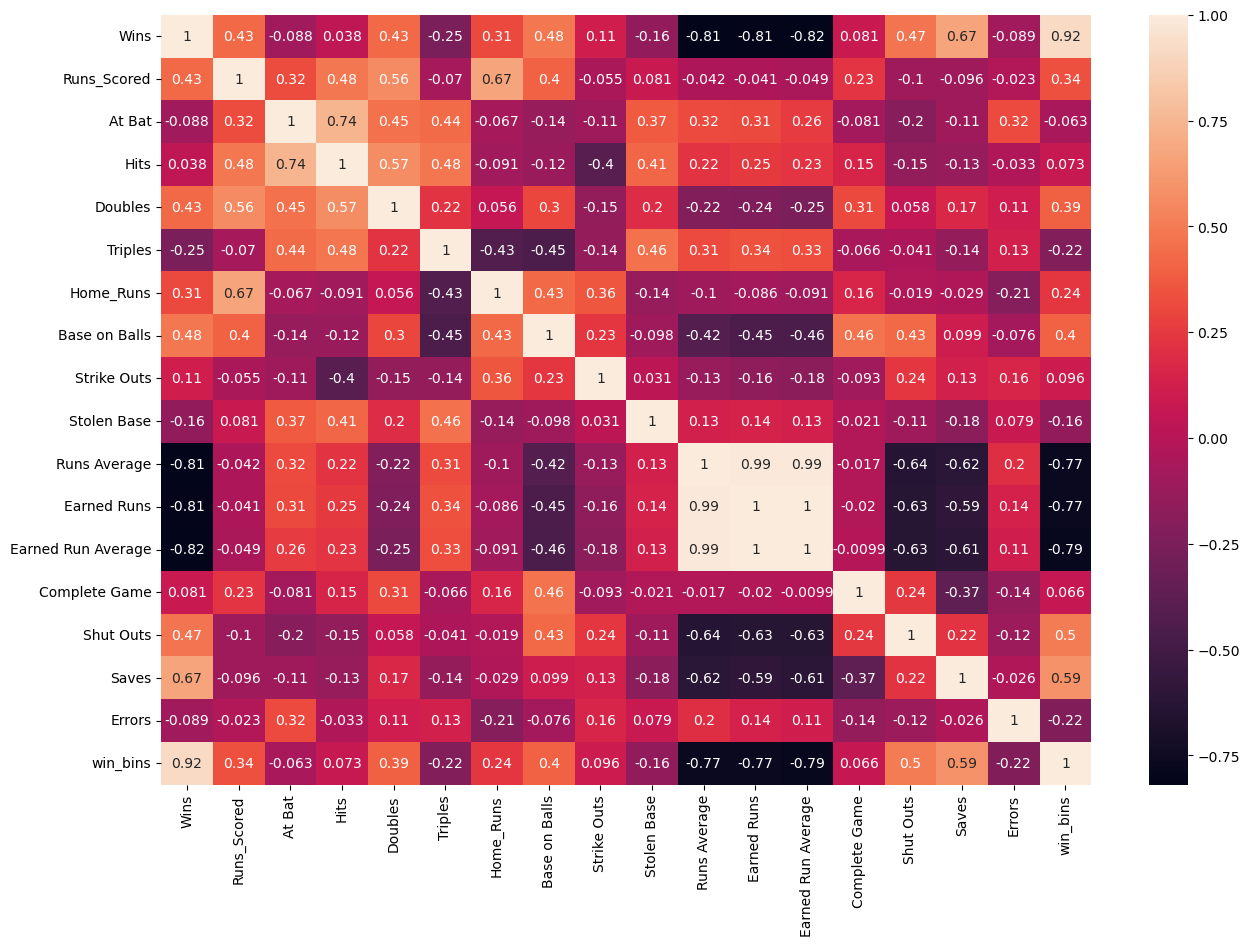

In [13]:
plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), annot = True)

Observations:
    1. Wins is correlated Runs average, Earns return and Earned Run Average.
    2. Wins is directly positively correlated to saves

## Explorartory Data Analysis

# Outlier Detection

C:\Users\gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


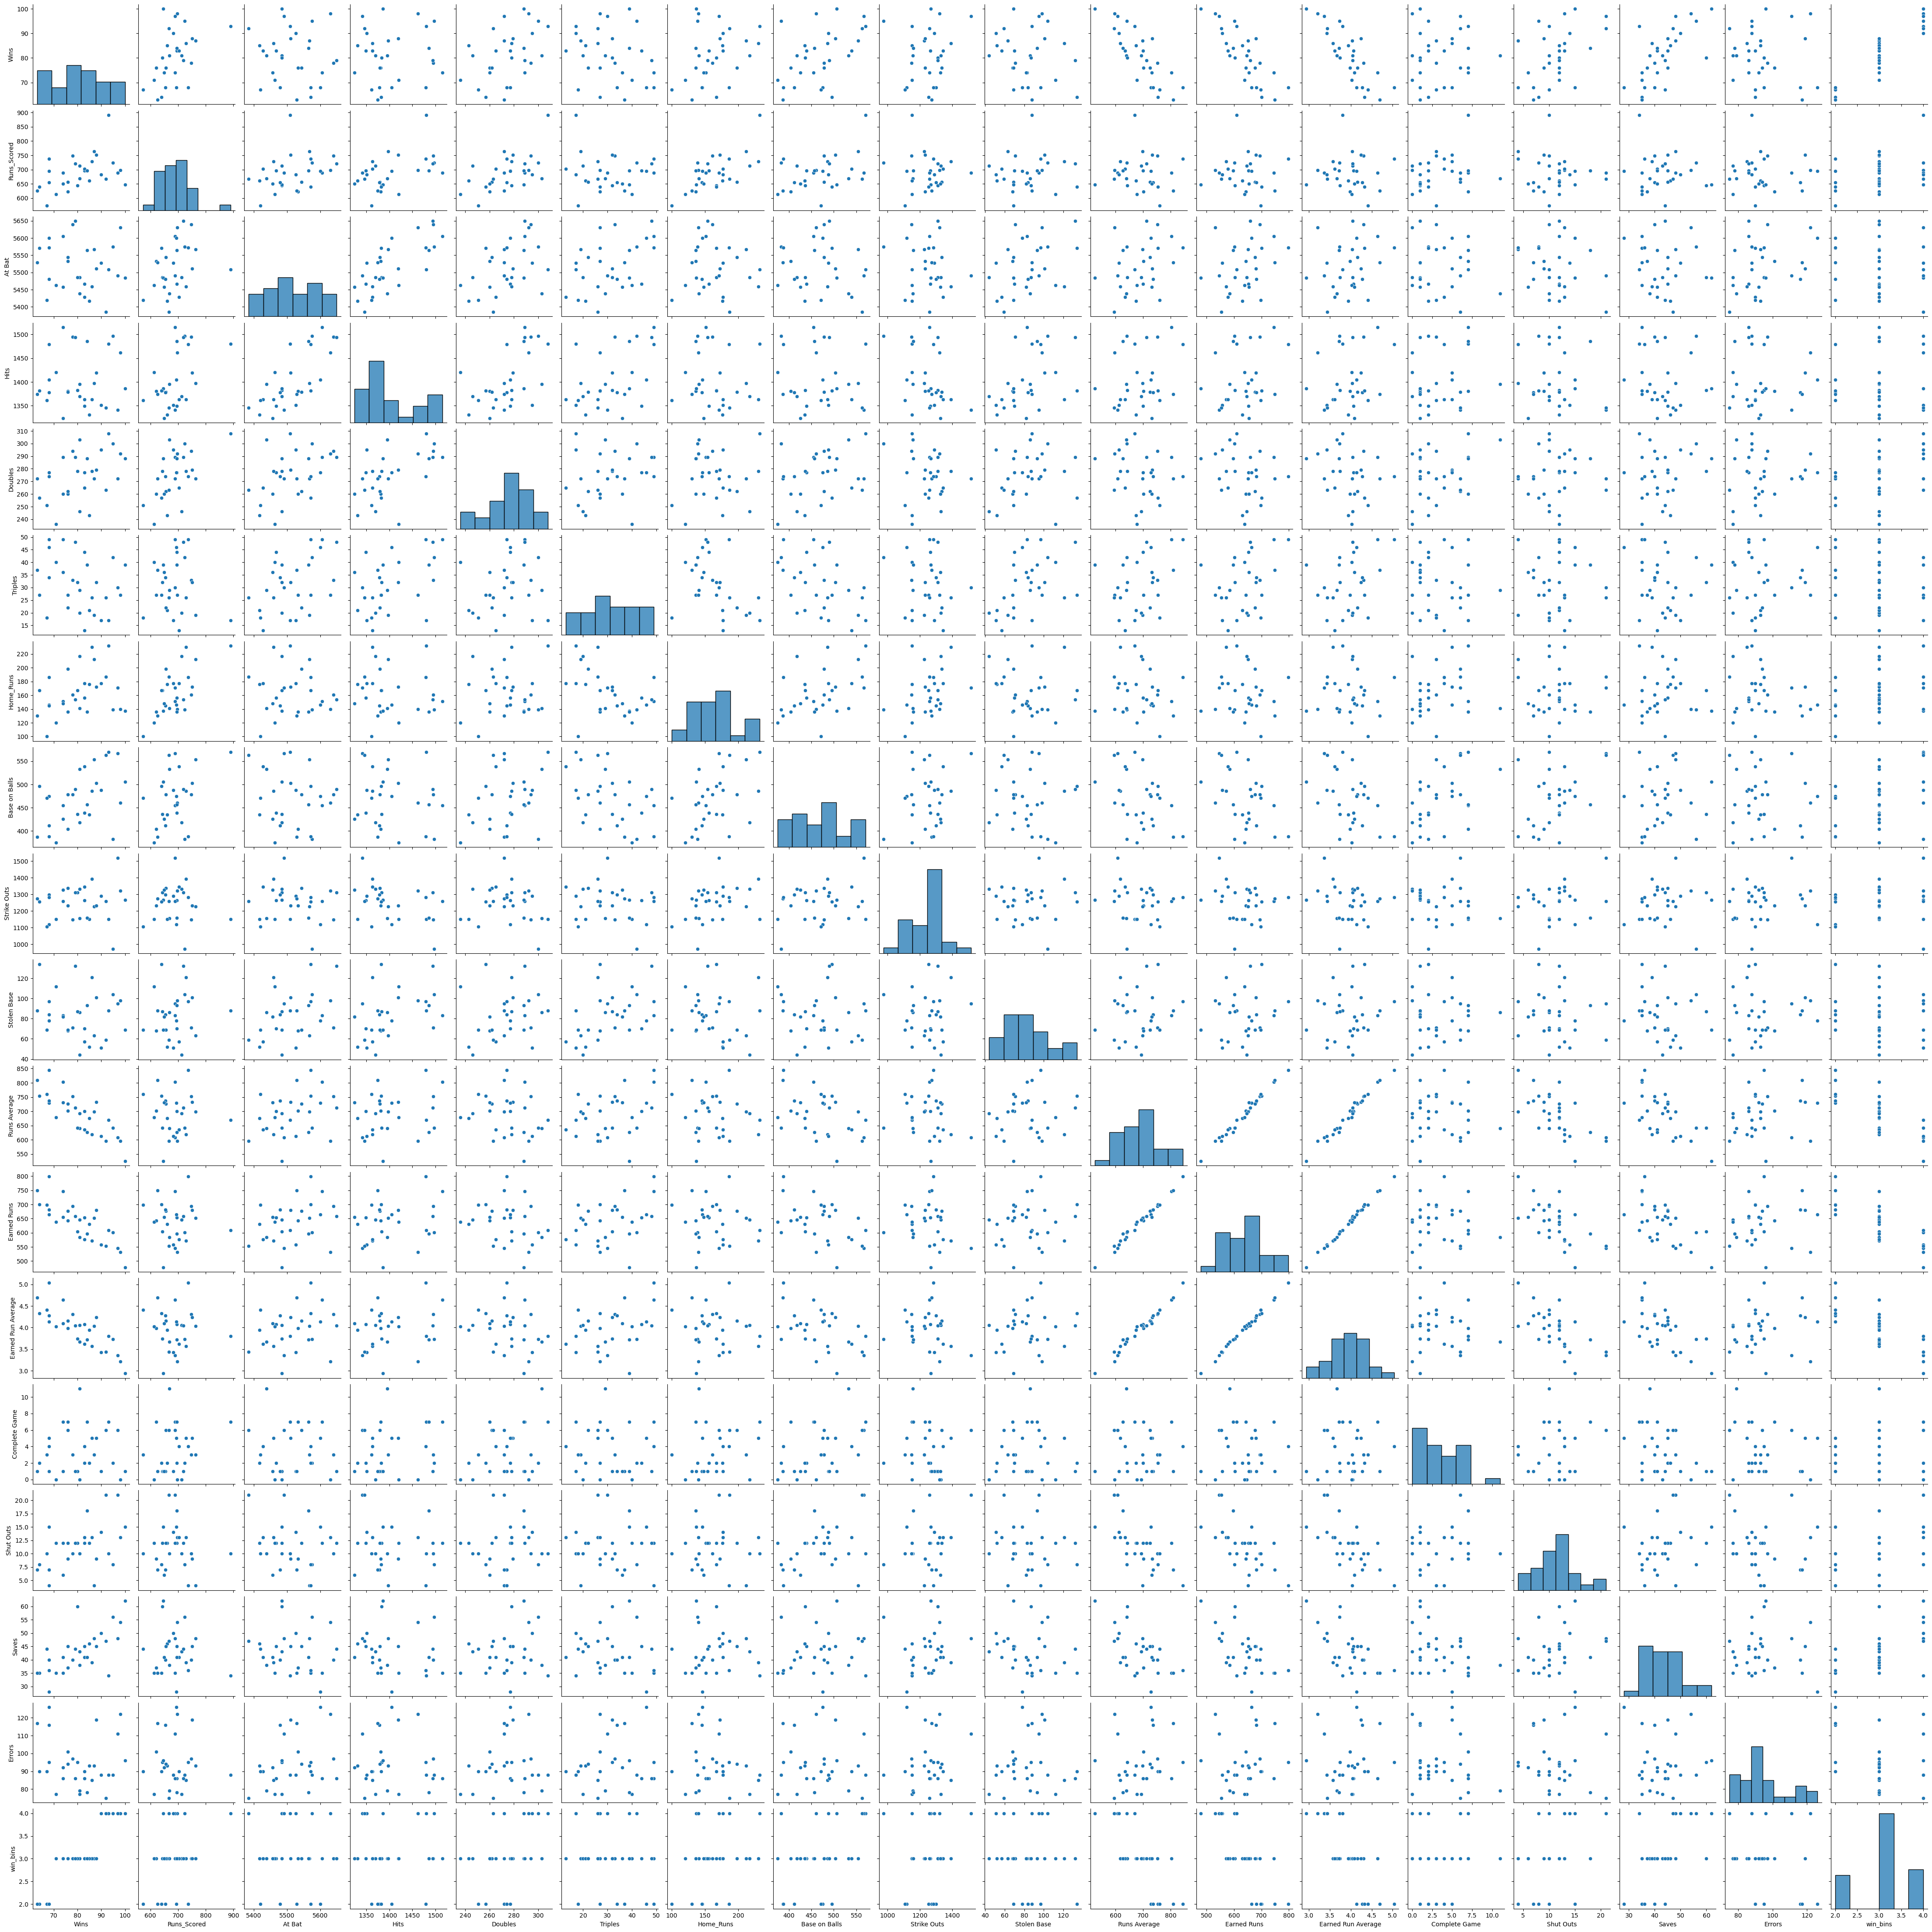

In [14]:
sns.pairplot(df)

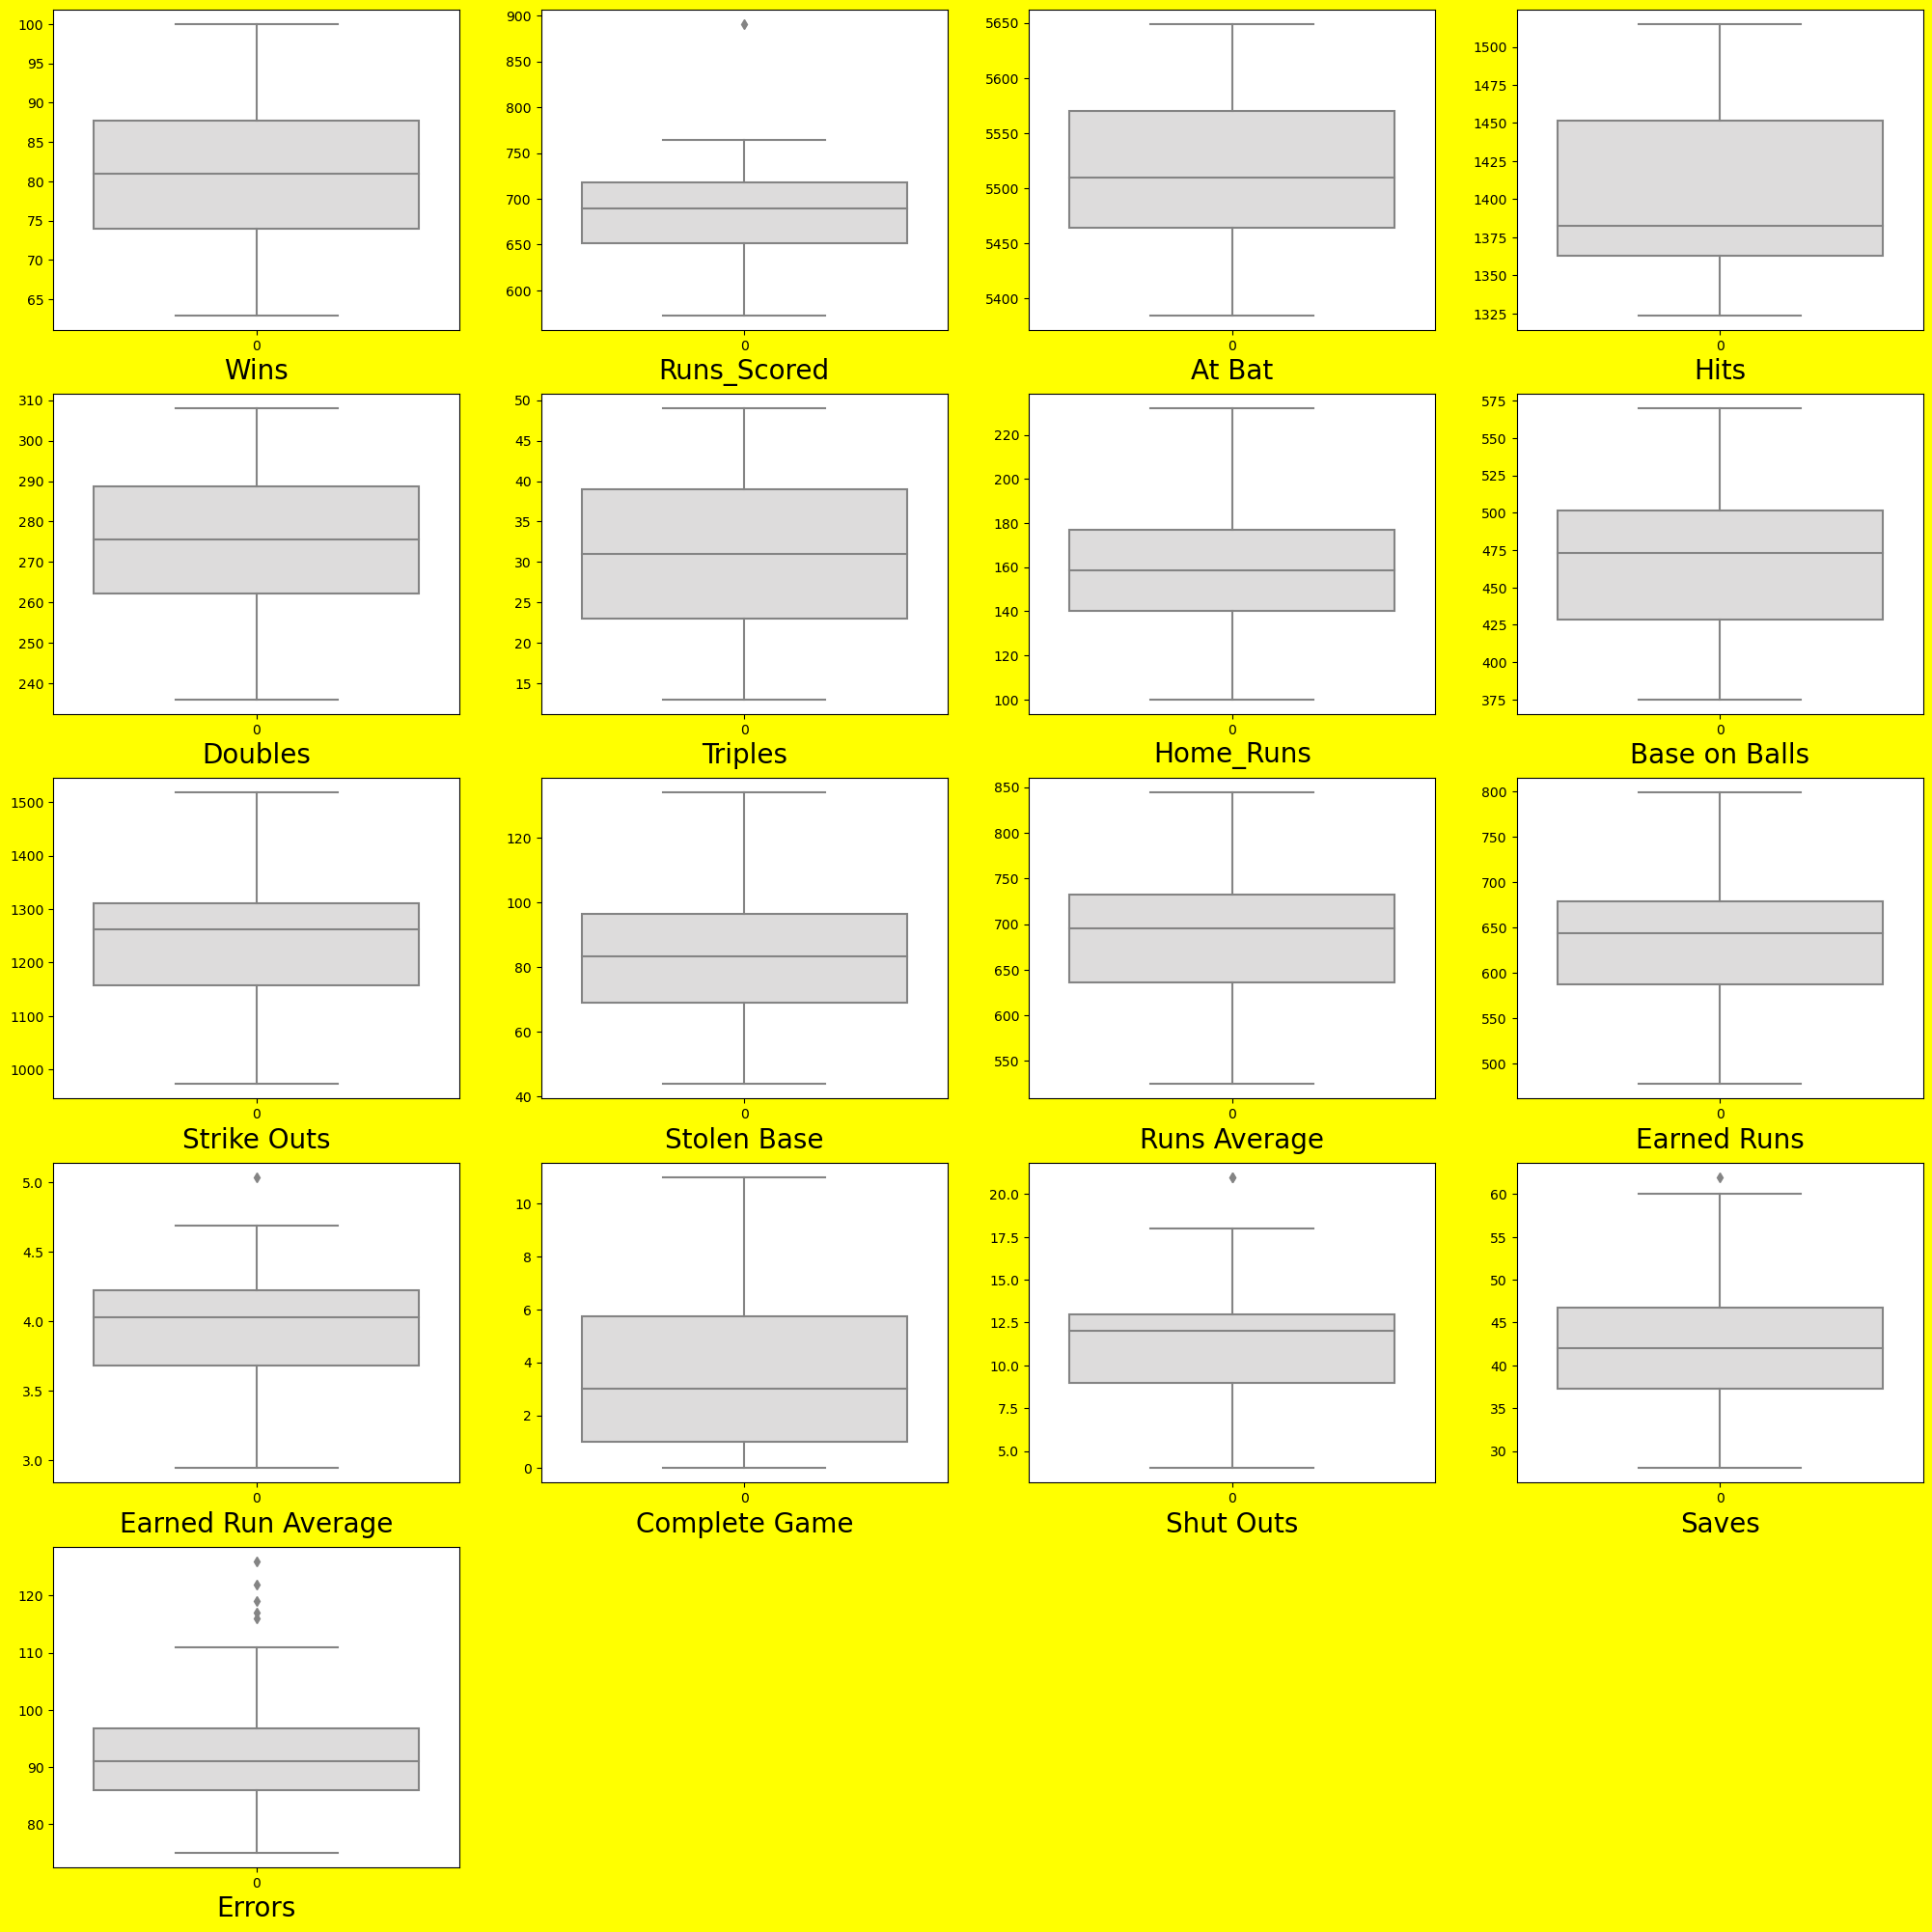

In [15]:
plt.figure(figsize=(25,25),facecolor='yellow')
index=1
for column in df:
    if index <=17:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

In [16]:
df.Errors.describe()

count     30.000000
mean      94.333333
std       13.958889
min       75.000000
25%       86.000000
50%       91.000000
75%       96.750000
max      126.000000
Name: Errors, dtype: float64

<Axes: xlabel='Errors', ylabel='Count'>

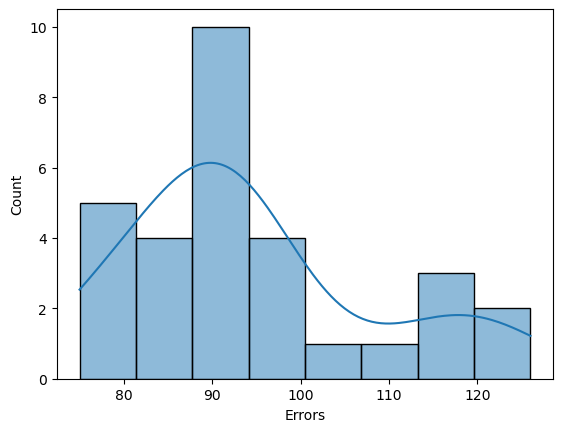

In [17]:
sns.histplot(df.Errors,kde=True)

Observations:
1. Outliers can be seen in runs scored, Earned average, shut outs, saves in maximum side.
2. More outliers can be seen in Errors.
3. And positive skew is when the long tail is on the positive side of the peak(Skewly Right)
   The mean is on the right of the peak value.

 

## Removing Outliers using z square

This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

In [18]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df))

# Set a threshold ( 3). 
#If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points.
#Such a data point can be an outlier.

threshold = 3

# Remove outliers
df1 = df[(z_scores < threshold).all(axis=1)]

In [19]:
print('Z score of the dataset is', z_scores)        

Z score of the dataset is         Wins  Runs_Scored    At Bat      Hits   Doubles   Triples  Home_Runs  \
0   1.365409     0.619078  0.847731  1.663685  1.420173  1.041193   0.787299   
1   0.197838     0.134432  0.711094  0.970681  0.127403  1.235809   0.243967   
2   0.003243     0.332906  1.115233  0.151891  1.588795  0.223808   0.723377   
3   0.483244     1.146419  0.241522  0.401088  0.828122  0.418423   0.883181   
4   0.677839     0.013270  1.280738  1.984081  0.801892  1.722347   0.403770   
5   1.170814     3.509647  0.104884  1.361089  1.869832  1.391501   2.185047   
6   0.587028     1.311430  0.732263  0.116292  0.153633  1.196885   1.545833   
7   0.003243     0.428681  0.451289  0.596886  1.615025  1.099578   1.705636   
8   0.094054     0.765626  0.451289  0.365489  0.183611  0.068115   0.107601   
9   0.288649     1.034489  1.785913  1.628086  1.082929  0.165423   0.084163   
10  0.684326     1.086415  0.076017  0.275303  0.239818  0.068115   0.267405   
11  0.489731  

In [20]:
#Shape after removing outliers
print('dataset after removing outliers :',df1.shape)

dataset after removing outliers : (29, 18)


In [21]:
#Data Loss
print('Data Lost :',((30-29)/30)*100,'%')

Data Lost : 3.3333333333333335 %


# Checking for Skewness

C:\Users\gupta\AppData\Local\Temp\ipykernel_6884\1410286215.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
C:\Users\gupta\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\gupta\AppData\Local\Temp\ipykernel_6884\1410286215.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code 

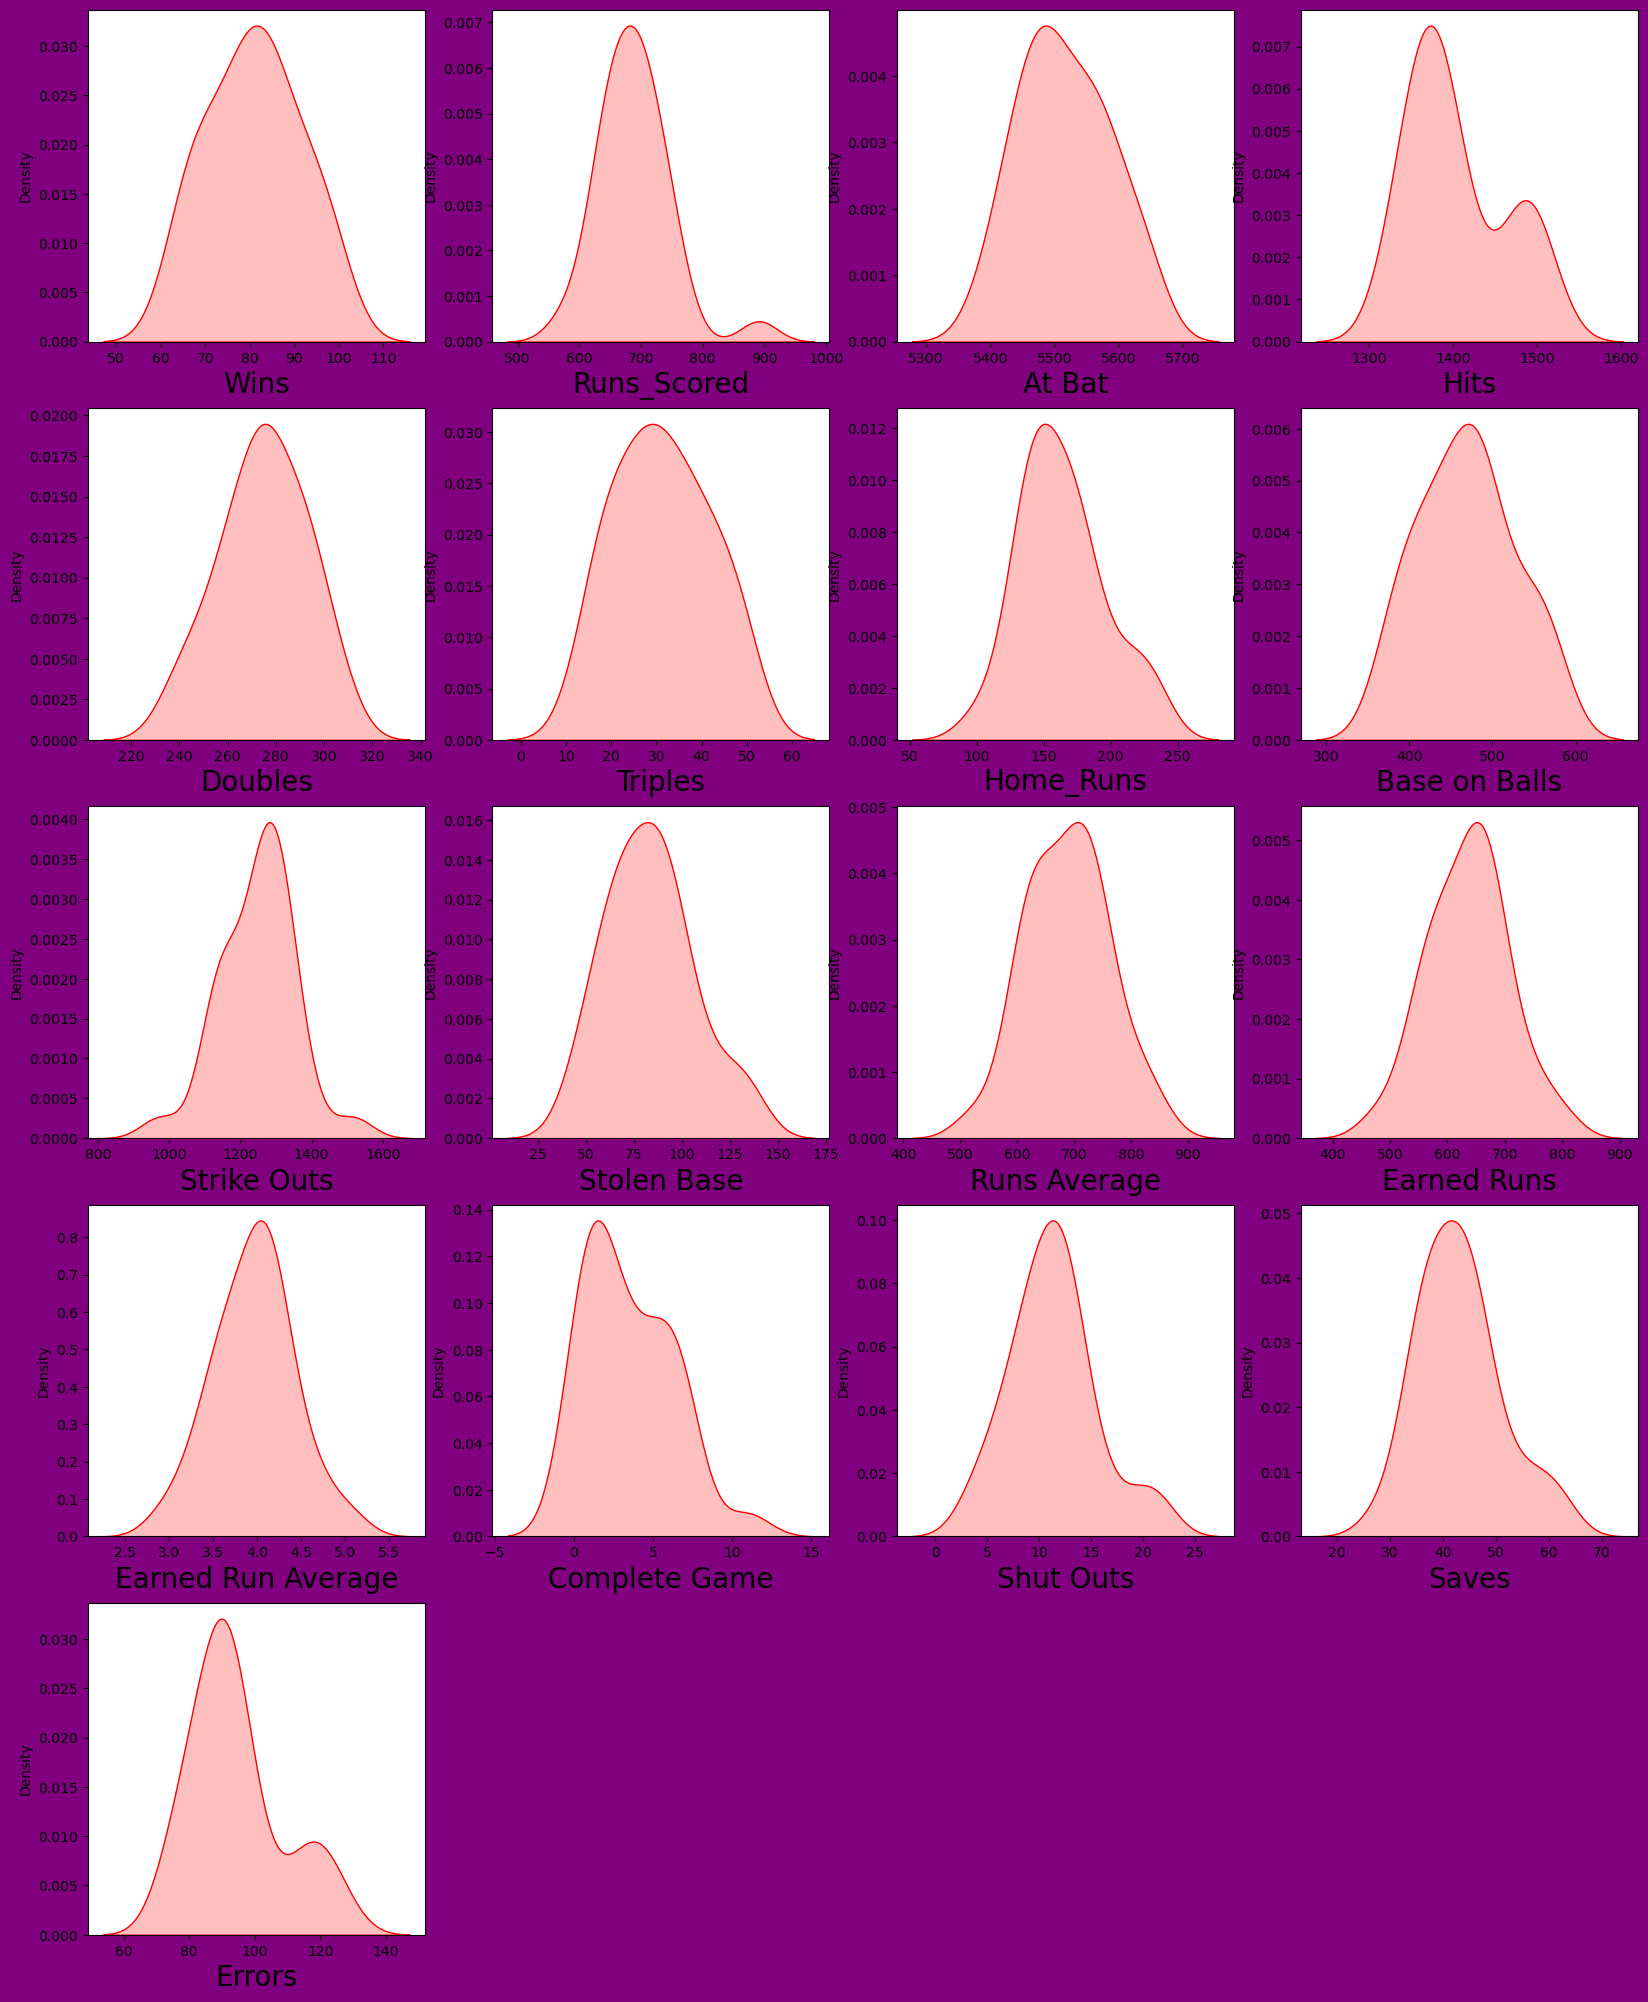

In [23]:
plt.figure(figsize=(20,25), facecolor='purple')
plotnumber=1
for column in df:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Observations:
1. 'Runs Scored', 'Complete Game', 'Shut Outs' and 'Errors' columns  have slightly skewed.


In [25]:
# To get unbiased skew over a specified axis
df1.skew()

Wins                  0.119013
Runs_Scored          -0.215364
At Bat                0.169573
Hits                  0.783772
Doubles              -0.335304
Triples               0.090124
Home_Runs             0.450862
Base on Balls         0.151193
Strike Outs          -0.233815
Stolen Base           0.494966
Runs Average          0.018155
Earned Runs           0.018461
Earned Run Average    0.016693
Complete Game         0.854980
Shut Outs             0.526943
Saves                 0.627480
Errors                0.840271
win_bins              0.000000
dtype: float64

Observations:
1. Optimal range for skewness is -0.5 to 0.5.
2. Hits, Complete Game, Shuts Outs, Saves, Errors are positively Skewed in nature.

In [26]:
df1.columns

Index(['Wins', 'Runs_Scored', 'At Bat', 'Hits', 'Doubles', 'Triples',
       'Home_Runs', 'Base on Balls', 'Strike Outs', 'Stolen Base',
       'Runs Average', 'Earned Runs', 'Earned Run Average', 'Complete Game',
       'Shut Outs', 'Saves', 'Errors', 'win_bins'],
      dtype='object')

## Removing Skewness using Log Transformation

log transformation is to reduce the variability of data, especially in data sets that include outlying observations. Again, contrary to this popular belief, log transformation can often increase – not reduce – the variability of data, irrespective of whether or not there are outliers.  

C:\Users\gupta\AppData\Local\Temp\ipykernel_6884\3340462222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column_name] = np.log1p(df[column_name])


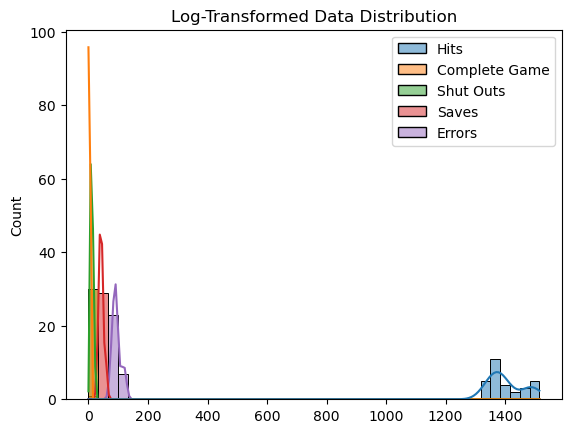

In [27]:
column_name = ['Hits','Complete Game','Shut Outs', 'Saves', 'Errors']

# Log transformation
df1[column_name] = np.log1p(df[column_name])

# Plot the transformed data to check for skewness
sns.histplot(df[column_name], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()

## Removing Skewness using Root Transformation

In [165]:
srt1=np.sqrt(df1[column_name])
srt1.head(15)

,Hits,Complete Game,Shut Outs,Saves,Errors
0,2.704050,1.048147,1.482304,2.010734,2.118640
1,2.684746,1.048147,1.601546,1.956691,2.113270
2,2.690979,1.576359,1.548514,1.914043,2.093329
3,2.689105,1.442027,1.517427,1.907246,2.150575
4,2.706258,1.442027,1.601546,1.893018,2.113270
6,2.691245,1.177410,1.268636,1.972770,2.131501
7,2.687619,0.000000,1.548514,1.945299,2.087273
8,2.689374,0.832555,1.601546,2.027529,2.136434
9,2.703803,1.177410,1.548514,1.927063,2.141254
10,2.694144,1.338566,1.517427,1.956691,2.188034


<Axes: >

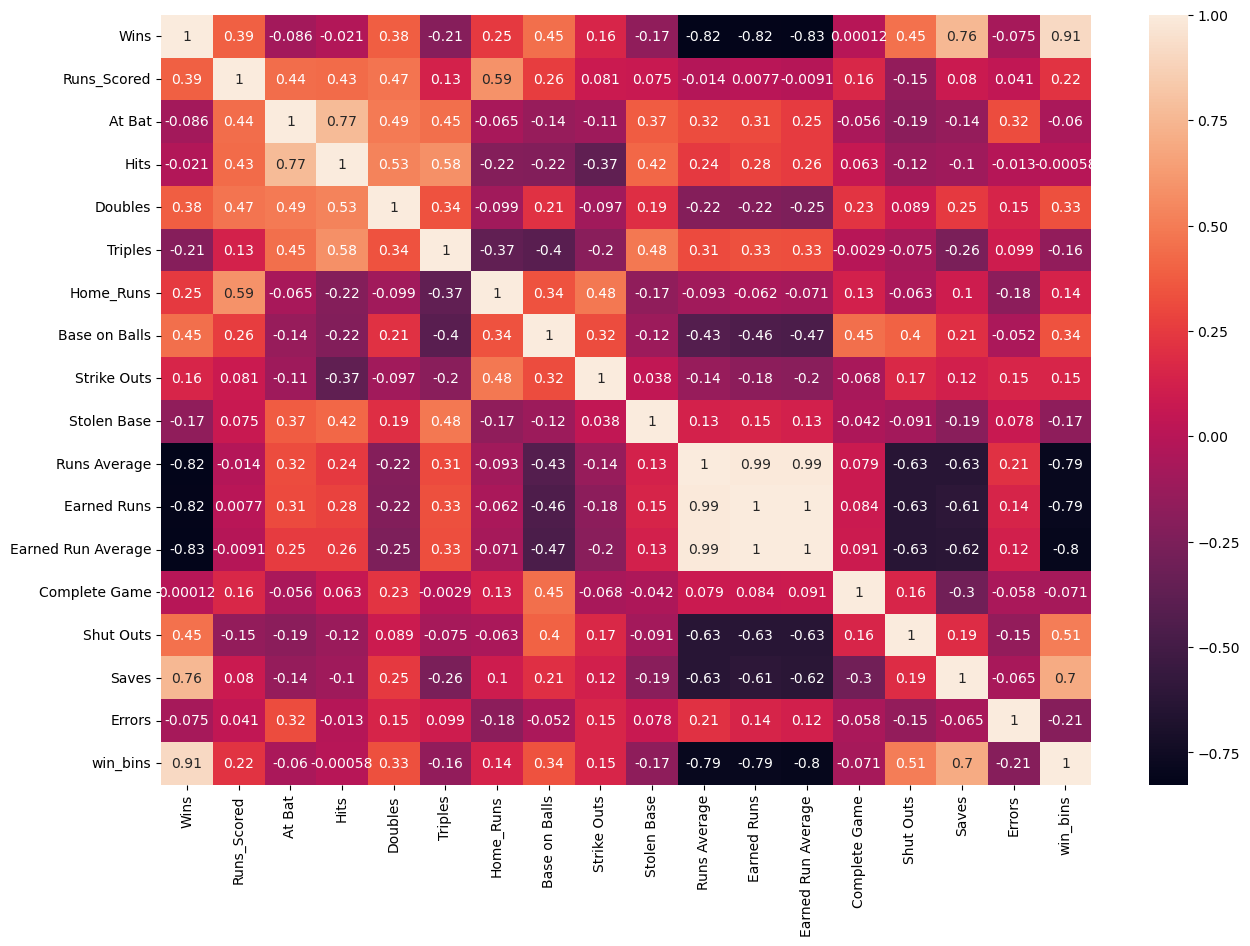

In [28]:
plt.figure(figsize = [15,10])
sns.heatmap(df1.corr(), annot = True)

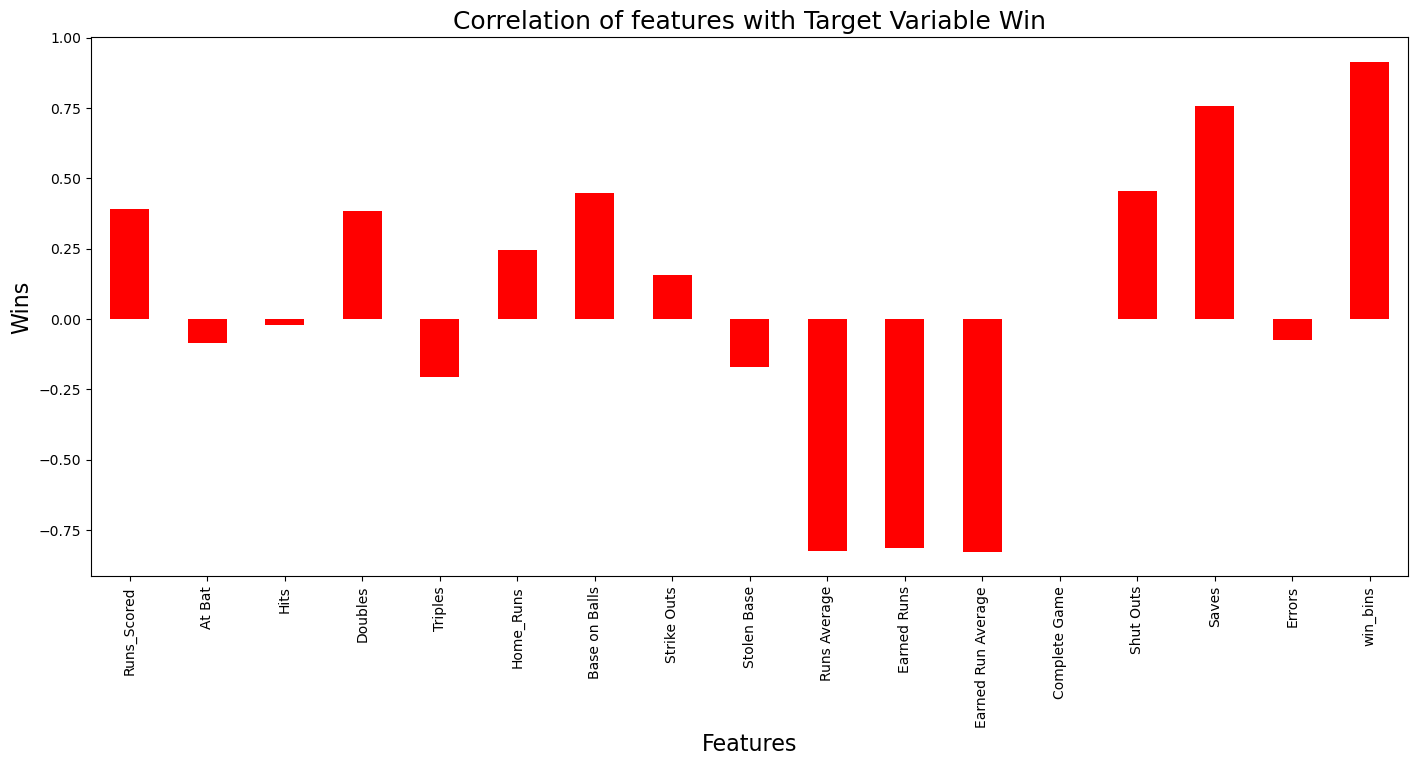

In [29]:
plt.figure(figsize = (17,7))
df1.corr()['Wins'].drop(['Wins']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=16)
plt.ylabel('Wins',fontsize=16)
plt.title('Correlation of features with Target Variable Win',fontsize = 18)
plt.show()

Observations:
 1. This figure also shows how Wins is correlated with other features.
 2. Win_bins, Shut outs and saves are highly positively correlated.
 3. Runs average, Earned runs and Earned Run Average are highly negatively correlated.

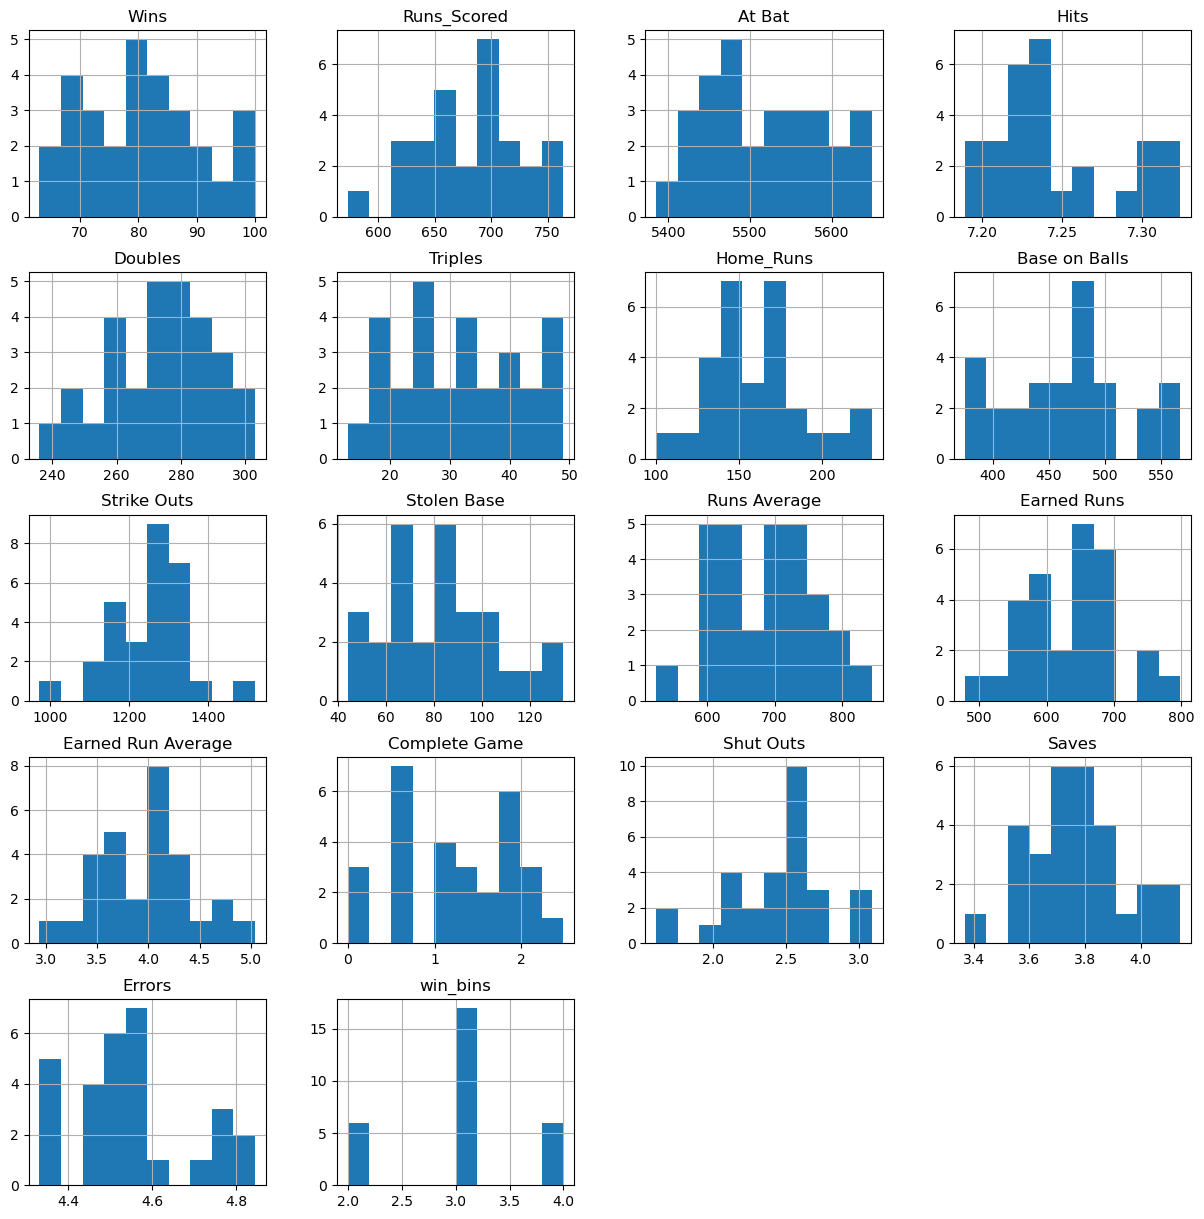

In [63]:
p = df1.hist(figsize = (15,15))

## Standard Scaling

In [30]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
X_scaled=scaler.fit_transform(X)

# Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms correlated variables into a set of linearly uncorrelated variables (principal components).
    
    Implementing PCA can help address multicollinearity.

In [33]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [34]:
X_=pd.DataFrame(X_pca,columns=np.arange(16))

variables with high VIF (typically VIF > 5 or 10), you may consider removing one of the highly correlated variables to address multicollinearity.


In [35]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df.shape[1])]
vif['Features'] = df1.columns
vif

,VIF,Features
0,2670.345926,Wins
1,2839.474096,Runs_Scored
2,127973.084459,At Bat
3,136494.123270,Hits
4,1011.762687,Doubles
5,34.025609,Triples
6,207.978896,Home_Runs
7,284.922248,Base on Balls
8,411.707550,Strike Outs
9,28.234284,Stolen Base


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X_.values, i)
                          for i in range(len(X_.columns))]
vif_data

,Features List,VIF Value
0,Runs_Scored,1.0
1,At Bat,1.0
2,Hits,1.0
3,Doubles,1.0
4,Triples,1.0
5,Home_Runs,1.0
6,Base on Balls,1.0
7,Strike Outs,1.0
8,Stolen Base,1.0
9,Runs Average,1.0


In [37]:
X_.skew()

0     0.083340
1    -0.080276
2     0.103081
3     0.287629
4     0.212725
5     0.790749
6    -0.045612
7    -0.029601
8     0.355878
9     0.125118
10    0.825647
11    0.692289
12    0.208147
13    0.401287
14    0.089020
15    0.329541
dtype: float64

## Machine learning Model

In [43]:
#Importing datasets for training , testing datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# Models from SkLearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [39]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [40]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X_, y, random_state=i, test_size=.2)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  94.17729162955166 
At Random State:  106


In [41]:
pred_data=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data

,predicted values,actual values
16,91.979090,98
13,79.959169,76
27,83.430357,79
26,89.650790,84
15,94.891108,100
10,84.417379,88


In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

print('\033[1m'+' Error :'+'\033[0m')
print('\nMean absolute error:',mean_absolute_error(y_test,y_pred))
print('\nMean squared error:',mean_squared_error(y_test,y_pred))
print('\nRoot Mean Sqaured Error:',np.sqrt(mean_squared_error(y_test,y_pred)))



 Error :

Mean absolute error: 4.792123307213989

Mean squared error: 23.736970771816473

Root Mean Sqaured Error: 4.872060218410326


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [50]:
# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [55]:
pred_data1=pd.DataFrame({'predicted values':y_pred,'actual values':y_test})
pred_data1

,predicted values,actual values
2,92,81
21,92,83
24,68,63
14,78,68
12,76,85
26,95,84


In [74]:
models={
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)#train models
    
#Model Predictions
y_train_pred=model.predict(X_train)
y_test_pred= model.predict(X_test)



In [110]:
#Training set performance
model_train_accuracy= accuracy_score(y_train, y_train_pred)
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # 'macro', 'micro', or 'weighted'

model_train_precision= precision_score(y_train, y_train_pred,average='weighted')
model_train_recall= recall_score(y_train, y_train_pred,average='weighted')

# Assuming `model` is your trained model and it has a method `predict_proba`
y_train_pred_proba = model.predict_proba(X_train)

# Then, you can compute the ROC AUC score for the multiclass case
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred_proba, average='weighted', multi_class='ovr')




In [111]:
#Test set performance
model_test_accuracy=accuracy_score(y_train, y_train_pred)
model_test_f1=f1_score(y_train, y_train_pred,average='weighted')


y_train_pred_proba = model.predict_proba(X_train)

# Assuming y_train_pred_proba contains the predicted probabilities for each class
model_test_rocauc_score = roc_auc_score(y_train, y_train_pred_proba, average='weighted', multi_class='ovr')





model_test_precision = precision_score(y_train, y_train_pred, average='weighted')
model_test_recall = recall_score(y_train, y_train_pred, average='weighted')
# If you also wish to calculate ROC AUC score, ensure to use the correct syntax and provide probability predictions
# model_test_rocauc_score = roc_auc_score(y_train, y_train_pred_proba, average='macro', multi_class='ovr')







In [112]:
print(list(models.keys())[i])

print('Model performance for training set')
print("-Accuracy: {:.4f}".format(model_train_accuracy))
#print("- F1 scores by class: ", model_train_f1)
print("- F1 score (weighted): {:.4f}".format(model_train_f1))


print("-precision(weighted): {:.4f}".format(model_train_precision))
print("-recall(weighted): {:.4f}".format(model_train_recall))
print("-rocauc_score (weighted): {:.4f}".format(model_train_rocauc_score))

print('=' * 35)
print('\n')

Random Forest
Model performance for training set
-Accuracy: 1.0000
- F1 score (weighted): 1.0000
-precision(weighted): 1.0000
-recall(weighted): 1.0000
-rocauc_score (weighted): 1.0000


